In [1]:
import pandas as pd

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv("iris/iris.data", names=column_names, header=None)

In [2]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print(df["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


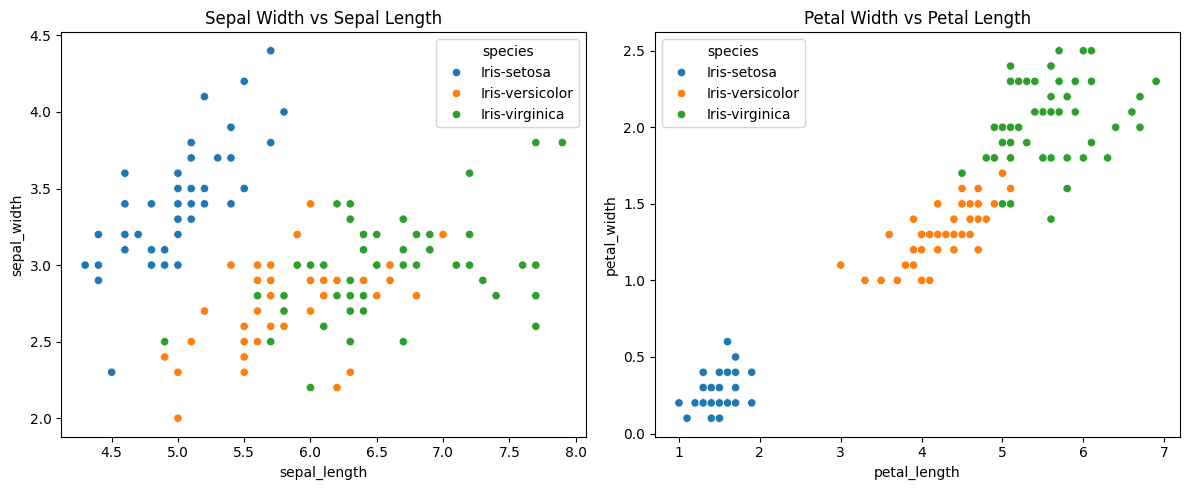

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sepal Width vs Sepal Length
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", ax=axes[0])
axes[0].set_title("Sepal Width vs Sepal Length")

# Petal Width vs Petal Length
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", ax=axes[1])
axes[1].set_title("Petal Width vs Petal Length")

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["species"])
y= df["species"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3 , random_state=42)
print(f"Train set size = {X_train.shape} \n Test set size={X_test.shape}")

Train set size = (105, 4) 
 Test set size=(45, 4)


In [20]:
from statistics import StatisticsError, mode
import numpy as np
import pandas as pd  # Ensure pandas is imported

class KNN:
    def __init__(self, K, distance_metric="euclidean"):
        self.k = K
        self.distance_metric = distance_metric

    def fit(self, X, Y):
        self.X_train = X.reset_index(drop=True)  # Reset index to avoid mismatches
        self.Y_train = Y.reset_index(drop=True)
        self.m, self.n = X.shape

    def predict(self, X_test):
        self.X_test = X_test.reset_index(drop=True)
        self.m_test, self.n = X_test.shape
        Y_predict = np.empty(self.m_test, dtype=object)  # Store predictions

        for i in range(self.m_test):
            x = self.X_test.iloc[i].to_numpy()  # Convert to NumPy array
            neighbors = self.find_neighbors(x)
            try:
                Y_predict[i] = mode(neighbors)  # Most common label
            except StatisticsError:  # Handle case where all are unique
                Y_predict[i] = neighbors[0]
        return Y_predict

    def find_neighbors(self, x):
        euclidean_distances = np.zeros(self.m)
        for i in range(self.m):
            d = self.euclidean(x, self.X_train.iloc[i].to_numpy())  # Convert to NumPy array
            euclidean_distances[i] = d

        inds = np.argsort(euclidean_distances)[:self.k]  # Get top-k indices
        return self.Y_train.iloc[inds].to_numpy()  # Convert to NumPy array

    def euclidean(self, x, x_train):
        return np.sqrt(np.sum(np.square(x - x_train)))  # Euclidean distance formula


In [25]:
from statistics import StatisticsError, mode
import numpy as np
import pandas as pd  # Ensure pandas is imported

class KNN2:
    def __init__(self, K, distance_metric="euclidean", p=3):
        self.k = K
        self.distance_metric = distance_metric.lower()  # Normalize input
        self.p = p  # For Minkowski distance

    def fit(self, X, Y):
        self.X_train = X.reset_index(drop=True)  # Reset index to avoid mismatches
        self.Y_train = Y.reset_index(drop=True)
        self.m, self.n = X.shape

    def predict(self, X_test):
        self.X_test = X_test.reset_index(drop=True)
        self.m_test, self.n = X_test.shape
        Y_predict = np.empty(self.m_test, dtype=object)  # Store predictions

        for i in range(self.m_test):
            x = self.X_test.iloc[i].to_numpy()  # Convert to NumPy array
            neighbors = self.find_neighbors(x)
            try:
                Y_predict[i] = mode(neighbors)  # Most common label
            except StatisticsError:  # Handle case where all are unique
                Y_predict[i] = neighbors[0]
        return Y_predict

    def find_neighbors(self, x):
        distances = np.zeros(self.m)
        for i in range(self.m):
            d = self.compute_distance(x, self.X_train.iloc[i].to_numpy())  # Compute distance
            distances[i] = d

        inds = np.argsort(distances)[:self.k]  # Get top-k indices
        return self.Y_train.iloc[inds].to_numpy()  # Convert to NumPy array

    def compute_distance(self, x, x_train):
        """ Selects the appropriate distance metric """
        if self.distance_metric == "euclidean":
            return np.sqrt(np.sum(np.square(x - x_train)))
        elif self.distance_metric == "manhattan":
            return np.sum(np.abs(x - x_train))
        elif self.distance_metric == "minkowski":
            return np.sum(np.abs(x - x_train) ** self.p) ** (1 / self.p)
        elif self.distance_metric == "cosine":
            dot_product = np.dot(x, x_train)
            norm_x = np.linalg.norm(x)
            norm_x_train = np.linalg.norm(x_train)
            return 1 - (dot_product / (norm_x * norm_x_train))
        else:
            raise ValueError(f"Unsupported distance metric: {self.distance_metric}")



In [26]:
model = KNN2(K=3,distance_metric="cosine")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(Y_pred[:5])  # Check first few predictions


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


model = KNN(K=3,distance_metric="cosine")
model.fit(X_train, Y_train)
y_pred_custom = model.predict(X_test)

custom_accuracy = accuracy_score(Y_test, y_pred_custom)
print(f"Custom KNN Accuracy: {custom_accuracy:.4f}")

knn_builtin = KNeighborsClassifier(n_neighbors=3)
knn_builtin.fit(X_train, Y_train)
y_pred_builtin = knn_builtin.predict(X_test)

builtin_accuracy = accuracy_score(Y_test, y_pred_builtin)
print(f"Scikit-learn KNN Accuracy: {builtin_accuracy:.4f}")


Custom KNN Accuracy: 1.0000
Scikit-learn KNN Accuracy: 1.0000
Both models have the same accuracy! 🎯
